In [67]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from pandas.plotting import parallel_coordinates
from sklearn.linear_model import LogisticRegression
# To evaluate our model
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [68]:
sonar=pd.read_csv("/content/drive/MyDrive/selected topics/sonar.csv")
sonar.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [69]:
# sonar = sonar.batch(1)
X = sonar.copy()

labels=  X.pop('Class')

# Initialize the Label Encoder.
le = LabelEncoder()

# Encode the categories
sonar['Class_enc'] = le.fit_transform(sonar['Class'])

y=sonar['Class_enc']

print(X)
print(y)
print(labels)

     attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
0         0.0200       0.0371       0.0428       0.0207       0.0954   
1         0.0453       0.0523       0.0843       0.0689       0.1183   
2         0.0262       0.0582       0.1099       0.1083       0.0974   
3         0.0100       0.0171       0.0623       0.0205       0.0205   
4         0.0762       0.0666       0.0481       0.0394       0.0590   
..           ...          ...          ...          ...          ...   
203       0.0187       0.0346       0.0168       0.0177       0.0393   
204       0.0323       0.0101       0.0298       0.0564       0.0760   
205       0.0522       0.0437       0.0180       0.0292       0.0351   
206       0.0303       0.0353       0.0490       0.0608       0.0167   
207       0.0260       0.0363       0.0136       0.0272       0.0214   

     attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  ...  \
0         0.0986       0.1539       0.1601       0.3109  

Feature selection

In [70]:
v_threshold = VarianceThreshold(threshold=0.008)
v_threshold.fit(X)
print(v_threshold.get_support())
allfeatures=v_threshold.get_support()

[False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False]


In [71]:
selected_features=[]
j=1
for i in allfeatures:
  if(i==True):
    selected_features.append('attribute_' + str(j))
  j+=1

# print(selected_features)
# for i in selected_features:
#   print(sonar[i])
print(len(selected_features))

38


In [72]:
columns=selected_features
df = pd.read_csv("/content/drive/MyDrive/selected topics/sonar.csv", usecols=selected_features)
# print(df.head())
x2=df.copy()
df['Class_enc'] = le.fit_transform(sonar['Class'])

y2=df['Class_enc']

# print(X)
# print(y)

Data visualization for the selected features

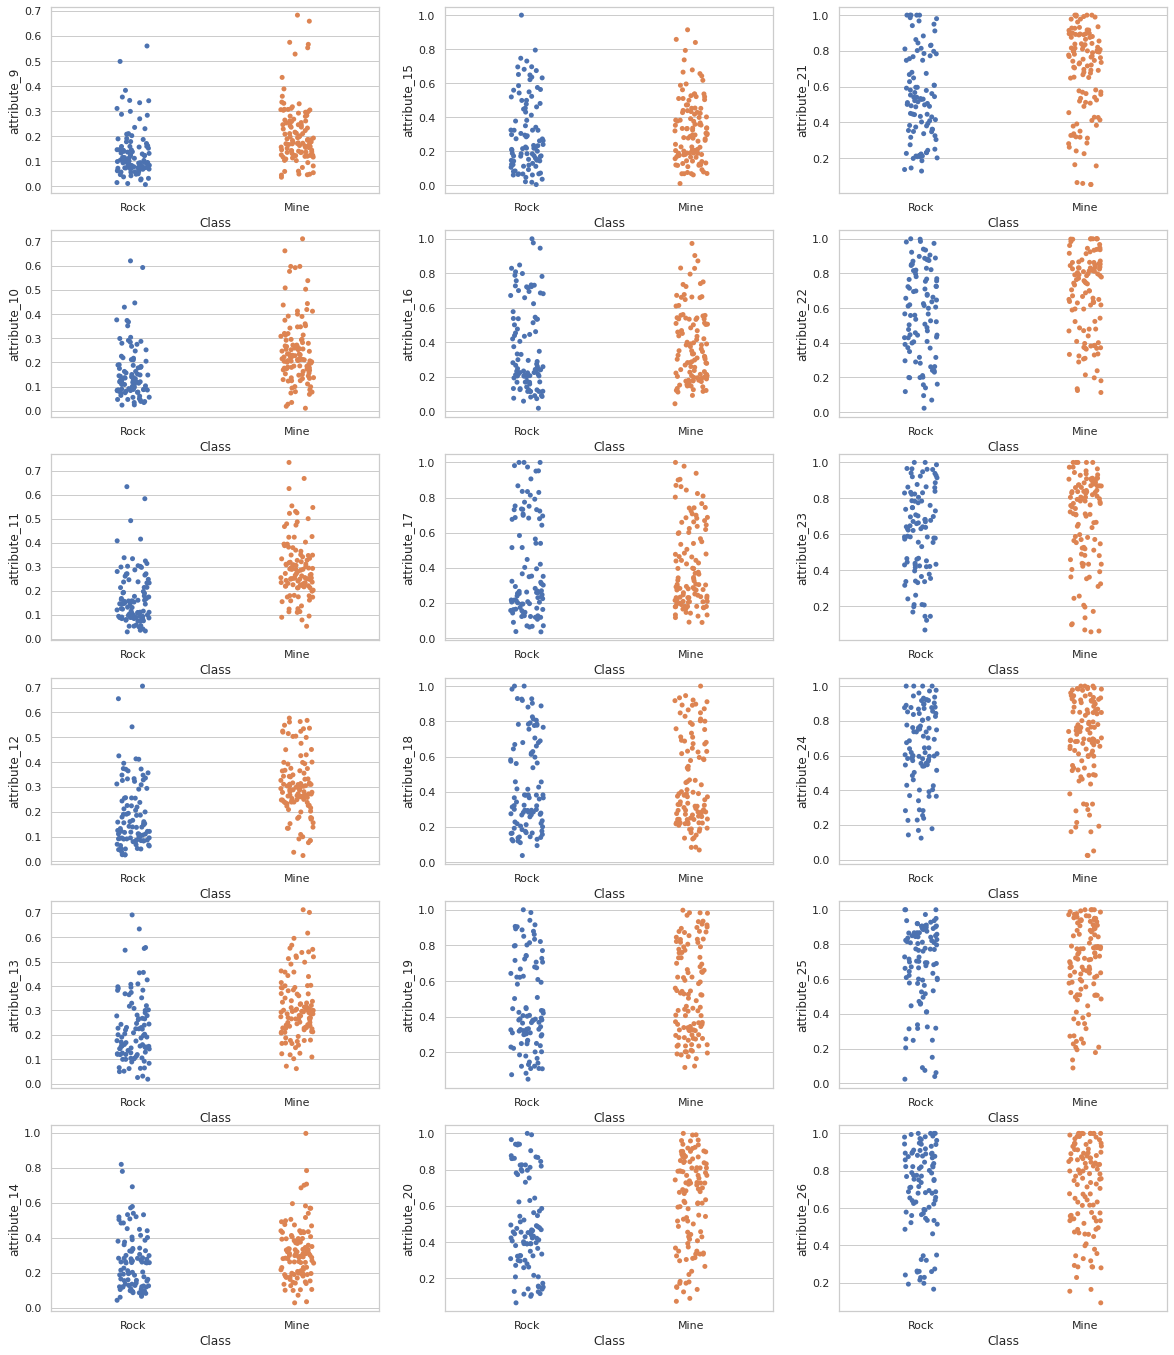

In [73]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(6, 3,sharey=False,sharex=False, figsize=(20,24))
x=0
for i in range(0,3):
  for j in range(0,6):
    if x>=18:
      break;
    # sns.relplot( y=sonar[selected_features[x]], hue="Class", data=sonar);
    sns.stripplot(x=sonar["Class"], y=sonar[selected_features[x]], data=sonar, ax=axes[j,i])
    x+=1
  if x>=18:
      break;


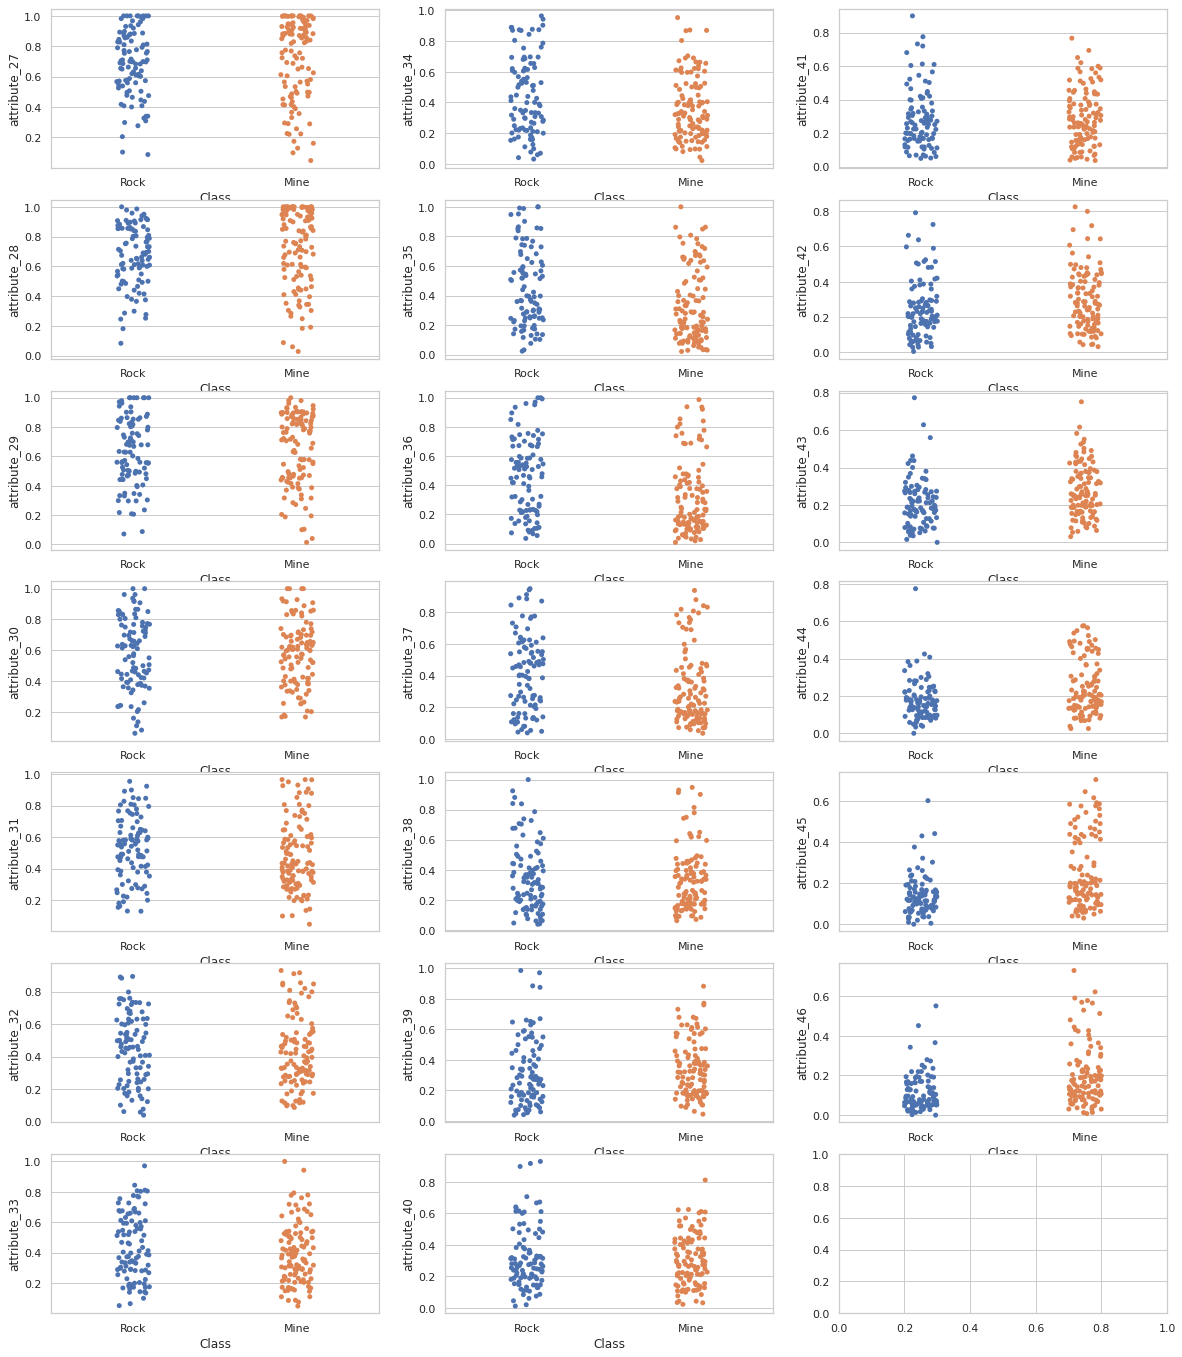

In [74]:
fig2, axes2 = plt.subplots(7, 3,sharey=False,sharex=False, figsize=(20,24))
for i in range(0,3):
  for j in range(0,7):
    if x>=len(selected_features):
      break;
    sns.stripplot(x=sonar["Class"], y=sonar[selected_features[x]], data=sonar, ax=axes2[j,i])
    x+=1
  if x>=len(selected_features):
      break;

Without feature selection



In [75]:
#stratify: split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.
#Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time the code is run

#using all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2, stratify=y)

In [76]:
no_xRows=X_train.shape[0]
print(X_train.shape)
no_xColumns=X_train.shape[1]
no_yRows=y_train.shape[0]

(156, 60)


In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

model = Sequential()
model.add(Dense(60, activation='relu', input_shape=(60,)))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy' ,optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20,verbose=1)
_, accuracy = model.evaluate(X_test, y_test, batch_size=no_xRows, verbose=2)
print(accuracy)

Epoch 1/20
5/5 [==============================] - 1s 5ms/step - loss: 0.6921 - accuracy: 0.5897
Epoch 2/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.6218
Epoch 3/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5513
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 0.6814 - accuracy: 0.5385
Epoch 5/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6776 - accuracy: 0.5385
Epoch 6/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.5513
Epoch 7/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6691 - accuracy: 0.5641
Epoch 8/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.5897
Epoch 9/20
5/5 [==============================] - 0s 7ms/step - loss: 0.6572 - accuracy: 0.6154
Epoch 10/20
5/5 [==============================] - 0s 8ms/step - loss: 0.6499 - accuracy: 0.6538
Epoch 11/20
5/5 [======================

In [78]:
model2 = Sequential()
model2.add(Dense(60, activation='relu', input_shape=(60,)))
model2.add(Dense(40, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy' ,optimizer='adam', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=20,verbose=1)
_, accuracy = model2.evaluate(X_test, y_test, batch_size=no_xRows, verbose=2)
print(accuracy)

Epoch 1/20
5/5 [==============================] - 1s 5ms/step - loss: 0.6927 - accuracy: 0.5321
Epoch 2/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.5321
Epoch 3/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6658 - accuracy: 0.5385
Epoch 4/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6555 - accuracy: 0.6474
Epoch 5/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6453 - accuracy: 0.6731
Epoch 6/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6364 - accuracy: 0.6859
Epoch 7/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6258 - accuracy: 0.6667
Epoch 8/20
5/5 [==============================] - 0s 4ms/step - loss: 0.6163 - accuracy: 0.6795
Epoch 9/20
5/5 [==============================] - 0s 6ms/step - loss: 0.6081 - accuracy: 0.6795
Epoch 10/20
5/5 [==============================] - 0s 5ms/step - loss: 0.5974 - accuracy: 0.6987
Epoch 11/20
5/5 [======================

With feature selection

In [79]:
#using some features
df_train, df_test, dfy_train, dfy_test = train_test_split(x2, y2, test_size=0.25, random_state=2, stratify=y2)

In [80]:
model3 = Sequential()
model3.add(Dense(38, activation='relu', input_shape=(38,)))
model3.add(Dense(40, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy' ,optimizer='adam', metrics=['accuracy'])
model3.fit(df_train, dfy_train, epochs=25,verbose=1)
_, accuracy = model3.evaluate(df_test, dfy_test, batch_size=no_xRows, verbose=2)
print(accuracy)

Epoch 1/25
5/5 [==============================] - 1s 3ms/step - loss: 0.7086 - accuracy: 0.4679
Epoch 2/25
5/5 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5449
Epoch 3/25
5/5 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.6154
Epoch 4/25
5/5 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.6026
Epoch 5/25
5/5 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.6026
Epoch 6/25
5/5 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6154
Epoch 7/25
5/5 [==============================] - 0s 3ms/step - loss: 0.6440 - accuracy: 0.6731
Epoch 8/25
5/5 [==============================] - 0s 3ms/step - loss: 0.6354 - accuracy: 0.6859
Epoch 9/25
5/5 [==============================] - 0s 4ms/step - loss: 0.6273 - accuracy: 0.7051
Epoch 10/25
5/5 [==============================] - 0s 4ms/step - loss: 0.6177 - accuracy: 0.6923
Epoch 11/25
5/5 [======================

In [83]:
model4 = Sequential()
model4.add(Dense(60, activation='relu', input_shape=(38,)))
model4.add(Dense(40, activation='relu'))
model4.add(Dense(20, activation='relu'))
model4.add(Dense(20, activation='softmax'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy' ,optimizer='adam', metrics=['accuracy'])
model4.fit(df_train, dfy_train, epochs=25,verbose=1)
_, accuracy = model4.evaluate(df_test, dfy_test, batch_size=no_xRows, verbose=2)
print(accuracy)

Epoch 1/25
5/5 [==============================] - 1s 3ms/step - loss: 0.6981 - accuracy: 0.4679
Epoch 2/25
5/5 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4679
Epoch 3/25
5/5 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4679
Epoch 4/25
5/5 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.4808
Epoch 5/25
5/5 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.7564
Epoch 6/25
5/5 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.6346
Epoch 7/25
5/5 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5897
Epoch 8/25
5/5 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.5962
Epoch 9/25
5/5 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5897
Epoch 10/25
5/5 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.5962
Epoch 11/25
5/5 [======================